In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Давайте попрактикуемся с SineNet:

1) Добавим еще один fc-слой

2) Заменим активацию между слоями на гиперболический тангенс

In [ ]:
import torch


class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
    

    def forward(self, x):
        res = self.fc3(
            self.act2(
                self.fc2(
                    self.act1(
                        self.fc1(x)
                        )
                    )
                )
            )
        return res


sine_net = SineNet(int(input()))
sine_net.forward(torch.Tensor([1.]))

print(sine_net)


Обучим нейронную сеть для задачи регрессии:

Возьмем более сложную функцию в качестве таргета: $y=2^x sin(2^{-x})$

Кроме того, мы хотим получить хорошую метрику MAE на валидации: ${MAE} = {\frac {1}{l}}\sum _{i=1}^{l}{|y\_pred_{i}-{y\_target_{i}}|}$
 
Вот пример того, как нейросеть может отрабатывать на данной функции:

<img src="../data/download (19).png">

Данный пример показывает MAE на валидации ~0.021 . Получите метрику не хуже 0.03

Что можно варьировать: 

1) Архитектуру сети

2) loss-функцию

3) lr оптимизатора

4) Количество эпох в обучении

Удачи!

In [42]:
import torch


def target_function(x):
    return 2**x * torch.sin(2**-x)

def loss(pred, target):
     return (pred - target).abs().mean()


class RegressionNet(torch.nn.Module):
    def __init__(self, n_nuerons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_nuerons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_nuerons, n_nuerons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_nuerons, n_nuerons)
        self.act3 = torch.nn.Tanh()
        self.fc4 = torch.nn.Linear(n_nuerons, 1)
        
    def forward(self, x):
        return self.fc4(self.act3(self.fc3(self.act2(self.fc2(self.act1(self.fc1(x)))))))


net = RegressionNet(100)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


In [28]:
%%time
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    
    if epoch_index % 20 == 0:
        print(epoch_index, end=" ")
    
    loss_value.backward()
    optimizer.step()
print()

0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 1000 1020 1040 1060 1080 1100 1120 1140 1160 1180 1200 1220 1240 1260 1280 1300 1320 1340 1360 1380 1400 1420 1440 1460 1480 1500 1520 1540 1560 1580 1600 1620 1640 1660 1680 1700 1720 1740 1760 1780 1800 1820 1840 1860 1880 1900 1920 1940 1960 1980 
Wall time: 4.63 s


In [30]:
print(metric(net.forward(x_validation), y_validation).item())

0.0229119211435318


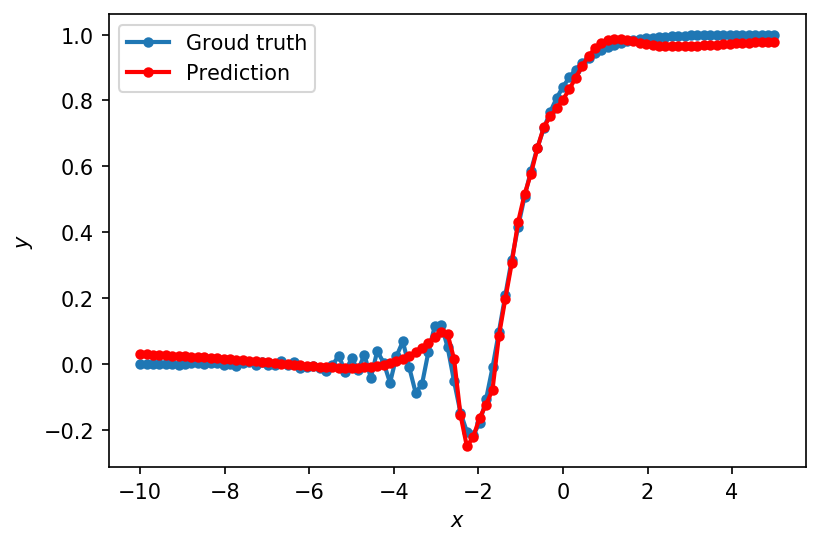

In [41]:
def predict(net, x, y):
    y_pred = net.forward(x)
    plt.figure(dpi=150)
    plt.plot(x.numpy(), y.numpy(), label='Groud truth', linewidth=2, markersize=4, marker="o")
    plt.plot(x.numpy(), y_pred.data.numpy(), c='r', label='Prediction', linewidth=2, markersize=4, marker="o");
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


predict(net, x_validation, y_validation)